In [1]:
import matlab.engine
import adaptive
import numpy as np
import matplotlib.pyplot as plt


C:\Users\hnpan\Anaconda3\envs\py36\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\hnpan\Anaconda3\envs\py36\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [3]:
eng = matlab.engine.start_matlab()

In [4]:
def goal(learner):
    return learner.loss() < 1e-2

In [5]:
y=np.zeros([41,21])

In [7]:
%%time
for vzind in range(21):
    vz=vzind*0.1;
    y[:,vzind]=[eng.dosseqd(1.,1.,0.2,0.,5.,.2,float('Inf'),0.,1.,100.,w/40*0.6-0.3,1e-3) for w in range(41)];   

Wall time: 1min 21s


In [5]:
func=lambda w:eng.dosseqd(1.,1.,0.2,0.,5.,.2,float('Inf'),0.,1.,100.,w,1e-3)

In [17]:
func(0.3)

171.62432629659222

In [44]:
func2=lambda x:float(eng.test(x))

In [43]:
func3=lambda x:x**2

In [45]:
func2(2)

4.0

In [46]:
learner=adaptive.Learner1D(function=func2,bounds=(-.3,.3))

In [47]:
runner=adaptive.Runner(learner,goal)

In [48]:
runner.task.done()

True

In [49]:
d=np.array(list(learner.data.items()))

In [51]:
learner.data

{}

Task exception was never retrieved
future: <Task finished coro=<AsyncRunner._run() done, defined at C:\Users\hnpan\Anaconda3\envs\py36\lib\site-packages\adaptive\runner.py:545> exception=MatlabExecutionError("Undefined function or variable '__getstate__'.\n",)>
Traceback (most recent call last):
  File "C:\Users\hnpan\Anaconda3\envs\py36\lib\site-packages\distributed\worker.py", line 2729, in dumps_function
    result = cache[func]
KeyError: <function <lambda> at 0x00000225D0656158>

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\hnpan\Anaconda3\envs\py36\lib\site-packages\distributed\protocol\pickle.py", line 38, in dumps
    result = pickle.dumps(x, protocol=pickle.HIGHEST_PROTOCOL)
_pickle.PicklingError: Can't pickle <function <lambda> at 0x00000225D0656158>: attribute lookup <lambda> on __main__ failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  F

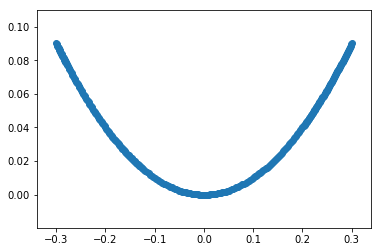

In [35]:
plt.scatter(d[:,0],d[:,1])

In [70]:
p=[func(w/40*0.6-0.3) for w in range(1)]

In [93]:
p=[func(w.item()) for w in np.linspace(-.3,.3,101)]

In [94]:
wl=[w  for w in np.linspace(-.3,.3,101)]

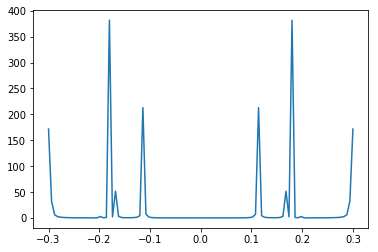

In [95]:
plt.plot(wl,p)

In [55]:
eng.hseqd(1.,1.,0.2,.1,5.,.2,float('Inf'),0.,1.,0,0,1.,100.)

0

In [41]:
eng.test(10.,nargout=0)

In [90]:
y[0,:]=np.ones(21)

In [92]:
y

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.,

In [38]:
import sys
print(sys.version)

3.6.8 |Anaconda, Inc.| (default, Feb 21 2019, 18:30:04) [MSC v.1916 64 bit (AMD64)]


In [47]:
a.result()

AttributeError: 'double' object has no attribute 'result'